In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

import IO

plt.rcParams ['figure.figsize'] = [15, 10]

In [2]:
# # Вспомогательные данные, по которым производится моделирование
map_1_dataset = IO.import_dataset_from_file("..\\Data\\Map_1.txt")
map_2_dataset = IO.import_dataset_from_file("..\\Data\\Map_2.txt")
# map_3_dataset = IO.import_dataset_from_file("..\\Data\\Map_3.txt")
# map_4_dataset = IO.import_dataset_from_file("..\\Data\\Map_4.txt")
# map_5_dataset = IO.import_dataset_from_file("..\\Data\\Map_5.txt")
#
# # Данные, по которым необходимо смоделировать
point_dataset = IO.import_dataset_from_file("..\\Data\\Point_dataset.txt")

In [3]:
def mean_pooling(input_array, pool_size):
    # Dimensions of the input array
    input_height, input_width = input_array.shape

    # Dimensions of the output array
    output_height = input_height // pool_size
    output_width = input_width // pool_size

    # Initialize the output array
    output_array = np.zeros((output_height, output_width))

    for i in range(output_height):
        for j in range(output_width):
            output_array[i, j] = np.mean(input_array[i * pool_size : (i + 1) * pool_size, j * pool_size : (j + 1) * pool_size])

    return output_array

In [4]:
point_dataset = np.load("Point_dataset_on_map_grid.npy")

In [11]:
point_dataset_pool = mean_pooling(point_dataset, 20)

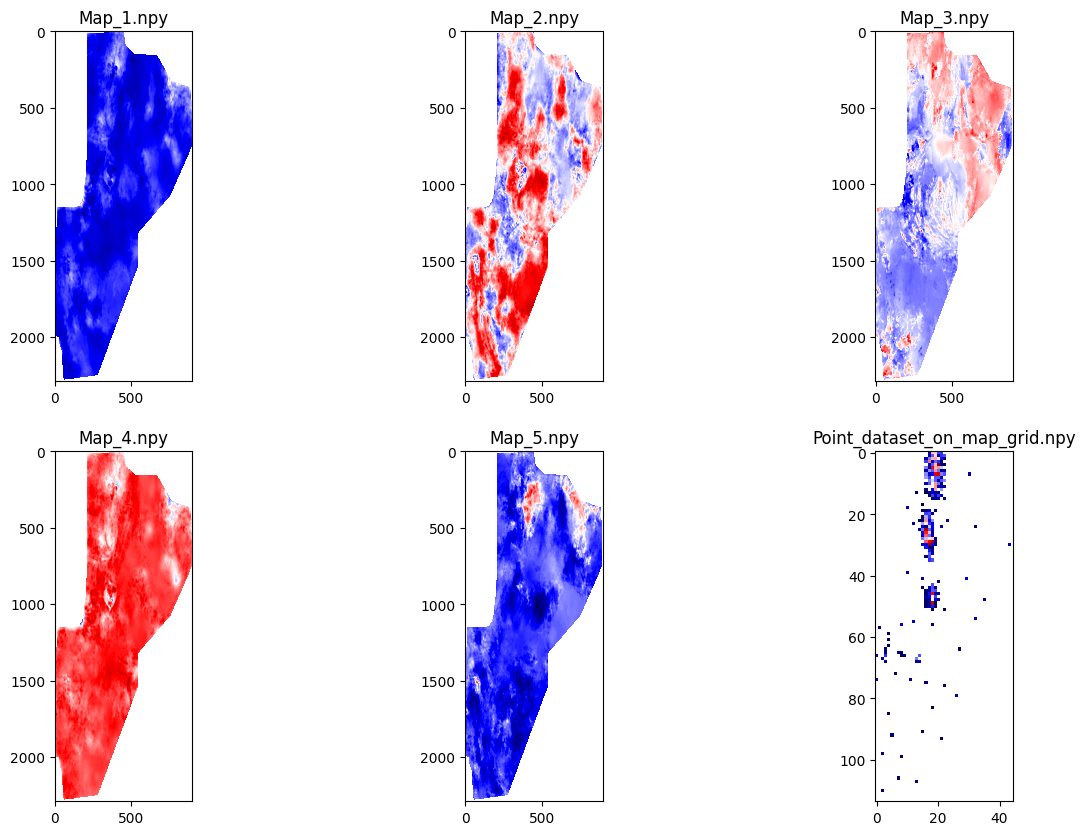

In [12]:
file_names = ["Map_1.npy", "Map_2.npy", "Map_3.npy", "Map_4.npy", "Map_5.npy"]

for i, item in enumerate(file_names):
    arr = np.load(item)
    arr[arr == 0] = np.nan

    plt.subplot(2, 3, i + 1)

    plt.title(item)
    plt.imshow(arr, cmap='seismic')

# plt.figure(figsize=(30, 30))


point_dataset_pool[point_dataset_pool == 0] = np.nan

plt.subplot(2, 3, 6)
plt.title("Point_dataset_on_map_grid.npy")
plt.imshow(point_dataset_pool, cmap='seismic')

plt.show()